In [ ]:
#Decision Trees - Intro and Regression

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Let's hide warnings

import warnings
warnings.filterwarnings('ignore')

In [7]:
from sklearn.datasets import fetch_openml

machine_cpu = fetch_openml(name='machine_cpu')

In [8]:
type(machine_cpu)

sklearn.utils.Bunch

In [9]:
machine_cpu.data.shape

(209, 6)

In [10]:
print(machine_cpu.DESCR)

**Author**:   
**Source**: Unknown -   
**Please cite**:   

The problem concerns Relative CPU Performance Data. More information can be obtained in the UCI Machine
 Learning repository (http://www.ics.uci.edu/~mlearn/MLSummary.html).
 The used attributes are :
 MYCT: machine cycle time in nanoseconds (integer)
 MMIN: minimum main memory in kilobytes (integer)
 MMAX: maximum main memory in kilobytes (integer)
 CACH: cache memory in kilobytes (integer)
 CHMIN: minimum channels in units (integer)
 CHMAX: maximum channels in units (integer)
 PRP: published relative performance (integer) (target variable)
 
 Original source: UCI machine learning repository. 
 Source: collection of regression datasets by Luis Torgo (ltorgo@ncc.up.pt) at
 http://www.ncc.up.pt/~ltorgo/Regression/DataSets.html
 Characteristics: 209 cases; 6 continuous variables

Downloaded from openml.org.


In [11]:
# Displaying feature names

machine_cpu.feature_names

['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']

In [12]:
# Getting the whole dataframe

machine_cpu.frame

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,class
0,125.0,256.0,6000.0,256.0,16.0,128.0,198.0
1,29.0,8000.0,32000.0,32.0,8.0,32.0,269.0
2,29.0,8000.0,32000.0,32.0,8.0,32.0,220.0
3,29.0,8000.0,32000.0,32.0,8.0,32.0,172.0
4,29.0,8000.0,16000.0,32.0,8.0,16.0,132.0
...,...,...,...,...,...,...,...
204,124.0,1000.0,8000.0,0.0,1.0,8.0,42.0
205,98.0,1000.0,8000.0,32.0,2.0,8.0,46.0
206,125.0,2000.0,8000.0,0.0,2.0,14.0,52.0
207,480.0,512.0,8000.0,32.0,0.0,0.0,67.0


In [13]:
machine_data = machine_cpu.data
machine_labels = machine_cpu.target

In [14]:
type(machine_data)

pandas.core.frame.DataFrame

In [15]:
type(machine_labels)

pandas.core.series.Series

In [ ]:
#Exploratory Analysis

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(machine_data,machine_labels, test_size=0.2,random_state=20)

print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(X_train), len(X_test)))

The size of training data is: 167 
The size of testing data is: 42


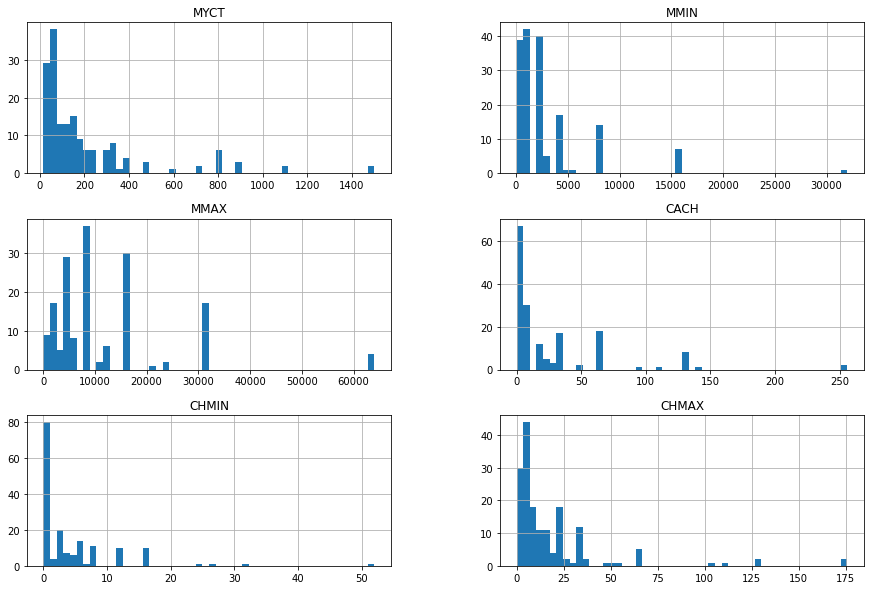

In [17]:
X_train.hist(bins=50, figsize=(15,10))
plt.show()

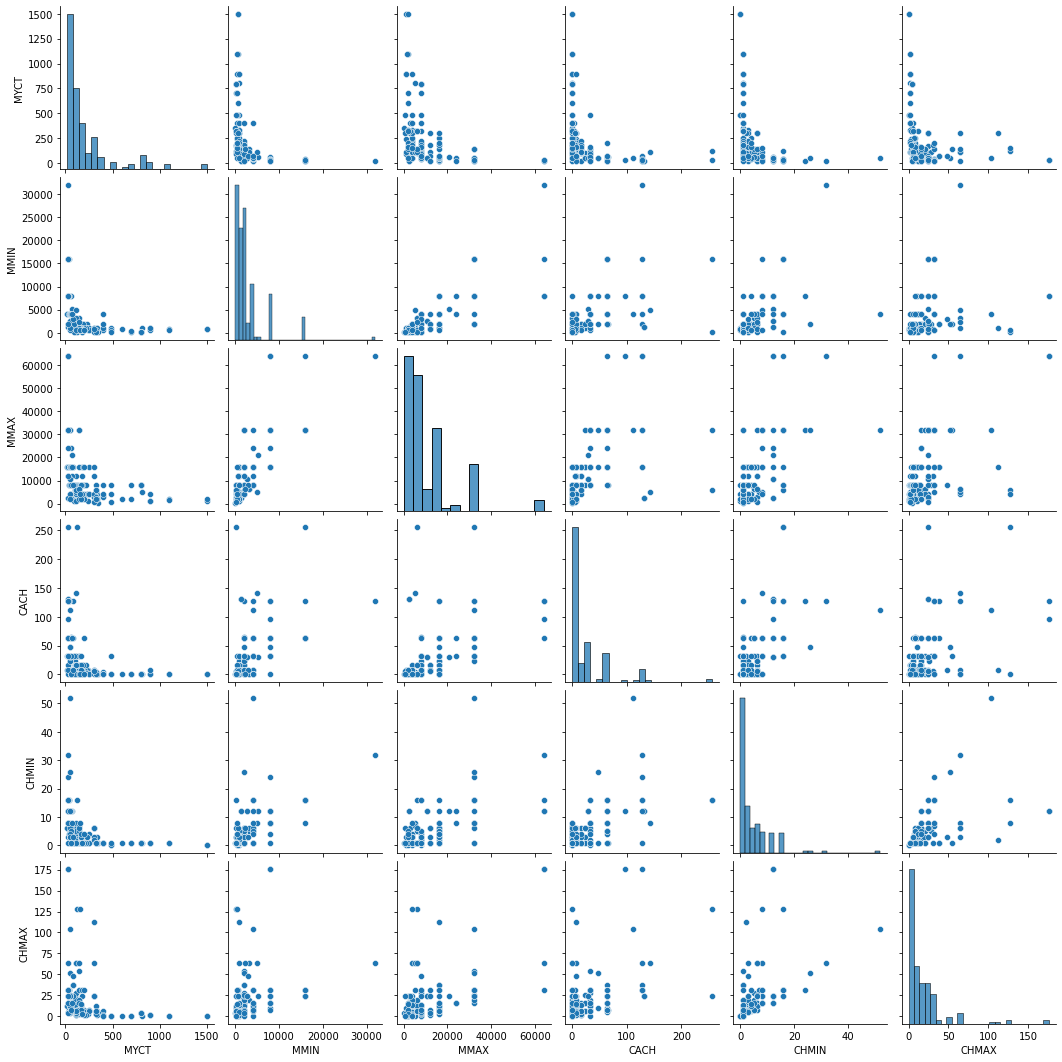

In [18]:
sns.pairplot(X_train)

In [19]:
# Checking summary stats

X_train.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,207.958084,2900.826347,11761.161677,26.071856,4.760479,18.616766
std,266.772823,4165.950964,12108.332354,42.410014,6.487439,27.489919
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000
75%,232.500000,3100.000000,16000.000000,32.000000,6.000000,24.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000


In [20]:
# Checking missing values

X_train.isnull().sum()

MYCT     0
MMIN     0
MMAX     0
CACH     0
CHMIN    0
CHMAX    0
dtype: int64

In [ ]:
#Data Preprocessing

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scale_pipe = Pipeline([
    ('scaler', StandardScaler())
    
])

X_train_scaled = scale_pipe.fit_transform(X_train)

In [23]:
#Training Decision Tree Regressor

In [24]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [25]:
tree_reg_scaled = DecisionTreeRegressor()

tree_reg_scaled.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [ ]:
#Evaluating Decision Trees

In [26]:
from sklearn.metrics import mean_squared_error

def predict(input_data,model,labels):
    """
    Take the input data, model and labels and return predictions
    
    """
    
    preds = model.predict(input_data)
    mse = mean_squared_error(labels,preds)
    rmse = np.sqrt(mse)
    rmse
    
    return rmse

In [27]:
predict(X_train, tree_reg, y_train)

9.724590719956222

In [28]:
predict(X_train_scaled, tree_reg_scaled, y_train)

9.724590719956222

In [ ]:
#Improving Decision Trees

In [29]:
tree_reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [30]:
from sklearn.model_selection import GridSearchCV

params_grid = {'max_leaf_nodes': list(range(0, 10)), 'min_samples_split': [0,1,2, 3, 4], 
              'max_depth':[None,0,1,2,3]}

#refit is true by default. The best estimator is trained on the whole dataset 

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), params_grid, verbose=1, cv=3, refit=True)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 250 candidates, totalling 750 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 0, 1, 2, 3],
                         'max_leaf_nodes': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [0, 1, 2, 3, 4]},
             verbose=1)

In [31]:
grid_search.best_params_

{'max_depth': None, 'max_leaf_nodes': 9, 'min_samples_split': 4}

In [32]:
grid_search.best_estimator_

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=4, random_state=42)

In [35]:
tree_best = grid_search.best_estimator_

In [36]:
predict(X_train, tree_best, y_train)

34.999530266023044

In [37]:
predict(X_test, tree_reg, y_test)

44.496187637658515